In [ ]:
!pip install transformers datasets seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.0 MB/s 
     |████████████████████████████████| 441 kB 41.1 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 7.6 MB 44.9 MB/s 
     |████████████████████████████████| 163 kB 56.2 MB/s 
     |████████████████████████████████| 115 kB 44.2 MB/s 
     |████████████████████████████████| 212 kB 71.1 MB/s 
     |████████████████████████████████| 95 kB 5.3 MB/s 
     |████████████████████████████████| 127 kB 64.7 MB/s 
     |████████████████████████████████| 115 kB 69.4 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16182 sha256=63bc2421d027898d64cd5e0fe5768cf44a53811b097cd4b91bc744d03d8e6120
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval
  Attempting uninstall: urllib3
    Foun

In [ ]:
!pip install polyfuzz[flair]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 7.9 MB/s 
     |████████████████████████████████| 401 kB 53.8 MB/s 
     |████████████████████████████████| 776.7 MB 3.9 kB/s 
     |████████████████████████████████| 788 kB 60.9 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
     |████████████████████████████████| 1.6 MB 35.4 MB/s 
     |████████████████████████████████| 1.2 MB 39.6 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 981 kB 50.8 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
     |████████████████████████████████| 200 kB 54.2 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=dbd3185c505cacb40e26a0d838026965f4edb2f6d2c805171def45879bbd090a
  Stored in directory: /root/.cache/pip/wheels/26/70/6a/1c79e599

In [ ]:
import pandas as pd
pd.options.display.max_colwidth = 5000  # set a value as your need

import networkx as nx
import matplotlib.pyplot as plt
import re

In [ ]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
#connect to G-Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
candidate_sentences = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/er-example3.csv')

In [ ]:
candidate_sentences

,pd
0,2. Η Γενική Διεύθυνση Διοικητικών Υπηρεσιών και Ηλεκτρονικής Διακυβέρνησης συγκροτείται από τις ακόλουθες οργανικές μονάδες:\nα) Διεύθυνσης Υποστήριξης Ανθρώπινου Δυναμικού και Υπηρεσιών.\nβ) Διεύθυνση Προμηθειών και Μέριμνας.\nγ) Διεύθυνση Ηλεκτρονικής Διακυβέρνησης και Εξυπηρέτησης του Πολίτη.
1,"2. Η Διεύθυνση Υποστήριξης Ανθρώπινου Δυναμικού και Υπηρεσιών συγκροτείται από τις ακόλουθες οργανικές μονάδες:\nα) Τμήμα Διοίκησης Ανθρώπινου Δυναμικού Υπουργείου Εργασίας Κοινωνικής Ασφάλισης και Κοινωνικής Αλληλεγγύης (ΥΠ.Ε.Κ.Α.Α.) και Σώματος Επιθεώρησης Εργασίας (Σ.ΕΠ.Ε.).\nβ) Τμήμα Διοίκησης Ανθρώπινου Δυναμικού Εποπτευομένων Φορέων.\nγ) Τμήμα Οργάνωσης και Απλούστευσης Διαδικασιών Υπουργείου Εργασίας Κοινωνικής Ασφάλισης και Κοινωνικής Αλληλεγγύης (ΥΠ.Ε.Κ.Α.Α.) και Σώματος Επιθεώρησης Εργασίας (Σ.ΕΠ.Ε.)\nδ) Τμήμα Οργάνωσης και Απλούστευσης Διαδικασιών Εποπτευομένων Φορέων.\nε) Τμήμα Ποιότητας, Αποδοτικότητας και Επιμόρφωσης Ανθρώπινου Δυναμικού.\nστ) Τμήμα Γραμματείας."


In [ ]:
ner_model = AutoModelForTokenClassification.from_pretrained("amichailidis/greek_legal_bert_v2-finetuned-ner-V3")
ner_tokenizer = AutoTokenizer.from_pretrained("amichailidis/greek_legal_bert_v2-finetuned-ner-V3")
ner_pip = pipeline("ner", model=ner_model, tokenizer=ner_tokenizer, grouped_entities=True)

Downloading:   0%|          | 0.00/826 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/449M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/541 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/509k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/token_classification.py:136: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  "`grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to"


In [ ]:
re_model = AutoModelForSequenceClassification.from_pretrained("amichailidis/greek_legal_bert_v2-finetuned-re-V2")
re_tokenizer = AutoTokenizer.from_pretrained("amichailidis/greek_legal_bert_v2-finetuned-re-V2")
re_pip = pipeline("text-classification", model=re_model, tokenizer=re_tokenizer)

Downloading:   0%|          | 0.00/836 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/452M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/509k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
def process_ner_output(entity_mention, inputs):
    re_input = []
    for idx1 in range(len(entity_mention) - 1):
        for idx2 in range(idx1 + 1, len(entity_mention)):
            ent_1 = entity_mention[idx1]
            ent_2 = entity_mention[idx2]

            ent_1_type = ent_1['entity_group']
            ent_2_type = ent_2['entity_group']
            ent_1_s = ent_1['start']
            ent_1_e = ent_1['end']
            ent_2_s = ent_2['start']
            ent_2_e = ent_2['end']
            new_re_input = ""
            for c_idx, c in enumerate(inputs):
                if c_idx == ent_1_s:
                    new_re_input += "<S:{:s}>".format(ent_1_type)
                elif c_idx == ent_1_e:
                    new_re_input += "</S:{:s}>".format(ent_1_type)
                elif c_idx == ent_2_s:
                    new_re_input += "<O:{:s}>".format(ent_2_type)
                elif c_idx == ent_2_e:
                    new_re_input += "</O:{:s}>".format(ent_2_type)
                new_re_input += c
            re_input.append({"re_input": new_re_input, "arg1": ent_1, "arg2": ent_2, "input": inputs})
    return re_input
    
def post_process_re_output(re_output, text_input, ner_output):
    final_output = []
    for idx, out in enumerate(re_output):
        if out["label"] != 'NoRel': #changed here from "O"
            tmp = re_input[idx]
            tmp['relation_type'] = out
            tmp.pop('re_input', None)
            final_output.append(tmp)

    template = {"input": text_input,
                "entity": ner_output,
                "relation": final_output}

    return template

In [ ]:
object=[]
subject=[]
relationship=[]

for (idx, row) in candidate_sentences.iterrows(): 

  for string in row: #remove Abbreviations in parentheses
    row = re.sub("\([Α-Ωα-ω]*.[Α-Ωα-ω.]*\)","",string)
    row = re.sub(' +', ' ',row)

  ner_output = ner_pip(str(row)) # inference NER tags
  re_input = process_ner_output(ner_output, str(row)) # prepare a pair of entity and predict relation type
  re_output = []

  for idx in range(len(re_input)):
      tmp_re_output = re_pip(re_input[idx]["re_input"]) # for each pair of entity, predict relation
      re_output.append(tmp_re_output[0])

  re_ner_output = post_process_re_output(re_output, str(row), ner_output) # post process NER and relation predictions
  print("Sentence: ",re_ner_output["input"])
  print('====Entity====')
  for ent in re_ner_output["entity"]:
    print('{}--{}'.format(ent["word"], ent["entity_group"]))
  print('====Relation====')
  for rel in re_ner_output["relation"]:
    print('{}--{}:{}'.format(rel['arg1']['word'], rel['arg2']['word'], rel['relation_type']['label']))

    subject.append(rel['arg1']['word'])
    object.append(rel['arg2']['word'])
    relationship.append(rel['relation_type']['label'])

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Sentence:  2. Η Γενική Διεύθυνση Διοικητικών Υπηρεσιών και Ηλεκτρονικής Διακυβέρνησης συγκροτείται από τις ακόλουθες οργανικές μονάδες:
α) Διεύθυνσης Υποστήριξης Ανθρώπινου Δυναμικού και Υπηρεσιών.
β) Διεύθυνση Προμηθειών και Μέριμνας.
γ) Διεύθυνση Ηλεκτρονικής Διακυβέρνησης και Εξυπηρέτησης του Πολίτη.
====Entity====
γενικη διευθυνση διοικητικων υπηρεσιων και ηλεκτρονικης διακυβερνησης--ORG
διευθυνσης υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων--ORG
διευθυνση προμηθειων και μεριμνας--ORG
διευθυνση ηλεκτρονικης διακυβερνησης και εξυπηρετησης του πολιτη--ORG
====Relation====
γενικη διευθυνση διοικητικων υπηρεσιων και ηλεκτρονικης διακυβερνησης--διευθυνσης υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων:SubOrg
γενικη διευθυνση διοικητικων υπηρεσιων και ηλεκτρονικης διακυβερνησης--διευθυνση προμηθειων και μεριμνας:SubOrg
γενικη διευθυνση διοικητικων υπηρεσιων και ηλεκτρονικης διακυβερνησης--διευθυνση ηλεκτρονικης διακυβερνησης και εξυπηρετησης του πολιτη:SubOrg
Sentence:  2. Η Διεύθυνση

## Create Graph

In [ ]:
#export relations into Dataframe
kg_df = pd.DataFrame({"subject":subject, "object": object, "relation": relationship})
kg_df = kg_df.drop_duplicates() #drop duplicates
kg_df

,subject,object,relation
0,γενικη διευθυνση διοικητικων υπηρεσιων και ηλεκτρονικης διακυβερνησης,διευθυνσης υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,SubOrg
1,γενικη διευθυνση διοικητικων υπηρεσιων και ηλεκτρονικης διακυβερνησης,διευθυνση προμηθειων και μεριμνας,SubOrg
2,γενικη διευθυνση διοικητικων υπηρεσιων και ηλεκτρονικης διακυβερνησης,διευθυνση ηλεκτρονικης διακυβερνησης και εξυπηρετησης του πολιτη,SubOrg
3,διευθυνση υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,τμημα διοικησης ανθρωπινου δυναμικου υπουργειου εργασιας κοινωνικης ασφαλισης και κοινωνικης αλληλεγγυης και σωματος επιθεωρησης εργασιας,SubOrg
4,διευθυνση υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,τμημα διοικησης ανθρωπινου δυναμικου εποπτευομενων φορεων,SubOrg
5,διευθυνση υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,τμημα οργανωσης και απλουστευσης διαδικασιων υπουργειου εργασιας κοινωνικης ασφαλισης και κοινωνικης αλληλεγγυης και σωματος επιθεωρησης εργασιας,SubOrg
6,διευθυνση υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,τμημα οργανωσης και απλουστευσης διαδικασιων εποπτευομενων φορεων,SubOrg
7,διευθυνση υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,"τμημα ποιοτητας, αποδοτικοτητας και επιμορφωσης ανθρωπινου δυναμικου",SubOrg
8,διευθυνση υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,τμημα γραμματειας,SubOrg


### Perform Fuzz to check closely related terms and replace them with a unique term

> Indented block



In [ ]:
subj=kg_df['subject'].values.tolist()
obj=kg_df['object'].values.tolist()

#we use embeddings
from polyfuzz import PolyFuzz
from polyfuzz.models import Embeddings
from flair.embeddings import TransformerWordEmbeddings

embeddings = TransformerWordEmbeddings('alexaapo/greek_legal_bert_v2')
bert = Embeddings(embeddings)
bert_model = PolyFuzz(bert)
bert_model.match(subj,obj)
bert_model.group(bert)

matches = bert_model.get_matches()
matches = matches.drop_duplicates() #drop duplicates

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/459 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/509k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/89.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/454M [00:00<?, ?B/s]

In [ ]:
#new dataframe
rslt_df = matches[matches['Similarity'] > 0.9] #keep only terms with similarity over 90%
rslt_df=rslt_df.reset_index() 
rslt_df

,index,From,To,Similarity,Group
0,3,διευθυνση υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,διευθυνσης υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,0.933,διευθυνσης υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων


In [ ]:
#replace the grouped value into our inital dataframe 
for i in range(len(rslt_df)):

  if rslt_df["From"][i] in kg_df.values:
    kg_df = kg_df.replace(rslt_df["From"][i],rslt_df["Group"][i])

  if rslt_df["To"][i] in kg_df.values:
    kg_df = kg_df.replace(rslt_df["From"][i],rslt_df["Group"][i])

kg_df

,subject,object,relation
0,γενικη διευθυνση διοικητικων υπηρεσιων και ηλεκτρονικης διακυβερνησης,διευθυνσης υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,SubOrg
1,γενικη διευθυνση διοικητικων υπηρεσιων και ηλεκτρονικης διακυβερνησης,διευθυνση προμηθειων και μεριμνας,SubOrg
2,γενικη διευθυνση διοικητικων υπηρεσιων και ηλεκτρονικης διακυβερνησης,διευθυνση ηλεκτρονικης διακυβερνησης και εξυπηρετησης του πολιτη,SubOrg
3,διευθυνσης υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,τμημα διοικησης ανθρωπινου δυναμικου υπουργειου εργασιας κοινωνικης ασφαλισης και κοινωνικης αλληλεγγυης και σωματος επιθεωρησης εργασιας,SubOrg
4,διευθυνσης υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,τμημα διοικησης ανθρωπινου δυναμικου εποπτευομενων φορεων,SubOrg
5,διευθυνσης υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,τμημα οργανωσης και απλουστευσης διαδικασιων υπουργειου εργασιας κοινωνικης ασφαλισης και κοινωνικης αλληλεγγυης και σωματος επιθεωρησης εργασιας,SubOrg
6,διευθυνσης υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,τμημα οργανωσης και απλουστευσης διαδικασιων εποπτευομενων φορεων,SubOrg
7,διευθυνσης υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,"τμημα ποιοτητας, αποδοτικοτητας και επιμορφωσης ανθρωπινου δυναμικου",SubOrg
8,διευθυνσης υποστηριξης ανθρωπινου δυναμικου και υπηρεσιων,τμημα γραμματειας,SubOrg


In [ ]:
kg_df = kg_df[kg_df['subject'] != kg_df['object']]
kg_df

### Make the Graph

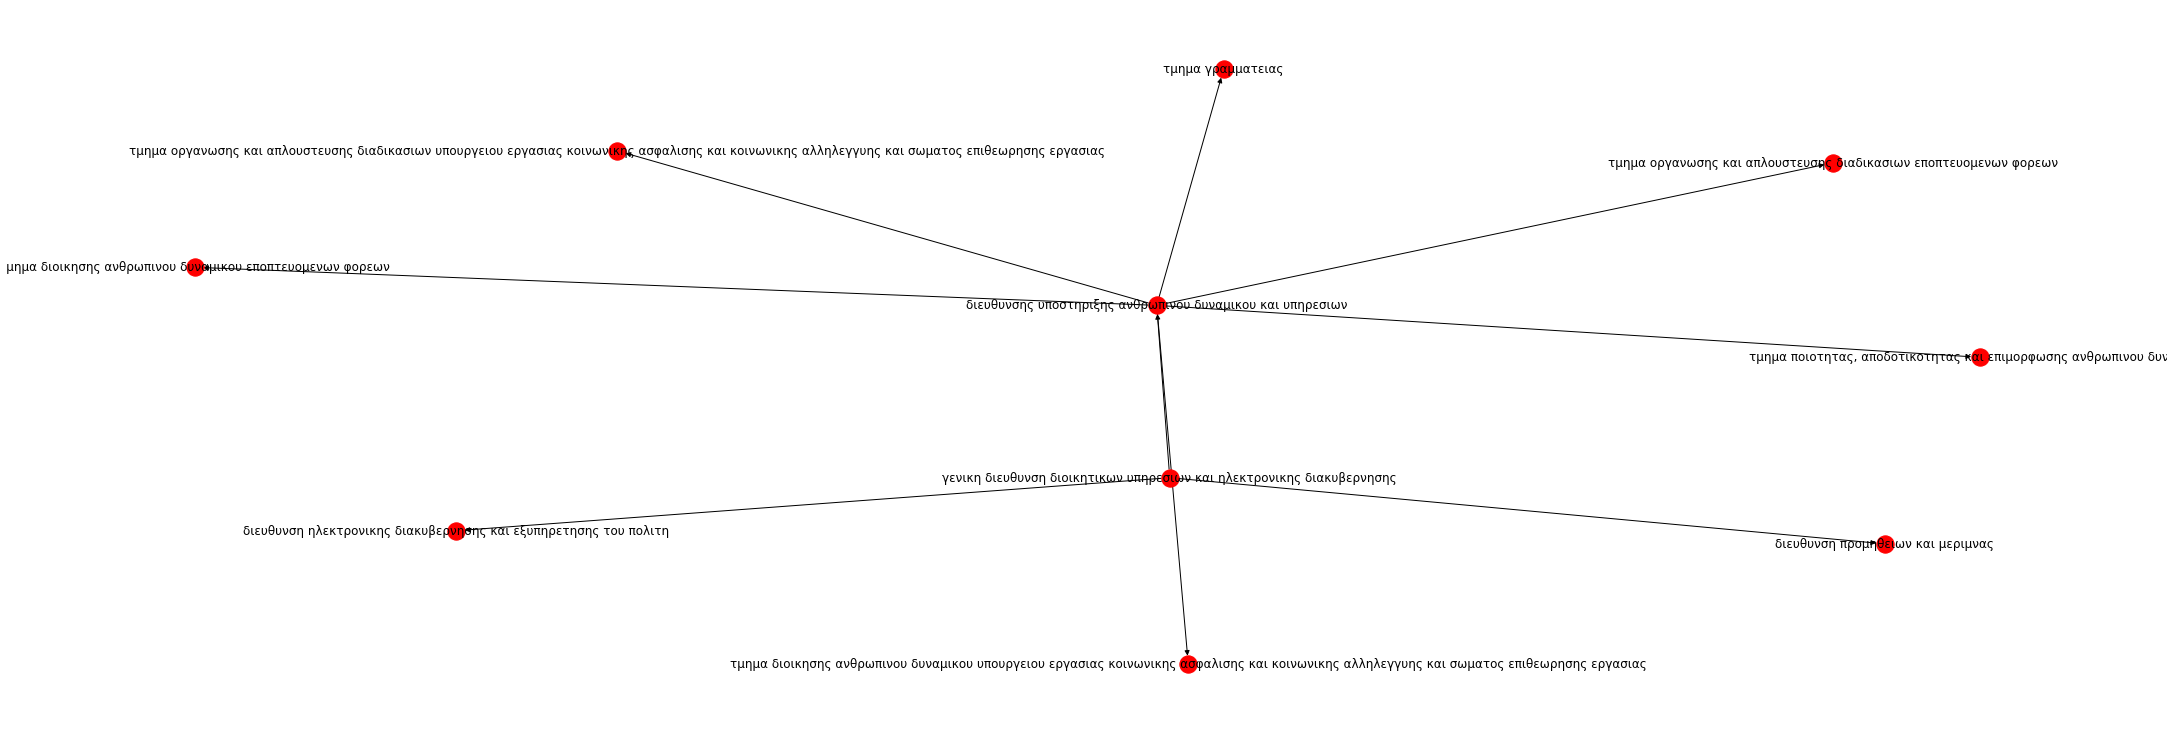

In [ ]:
G=nx.from_pandas_edgelist(kg_df, "subject", "object", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(30,10))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

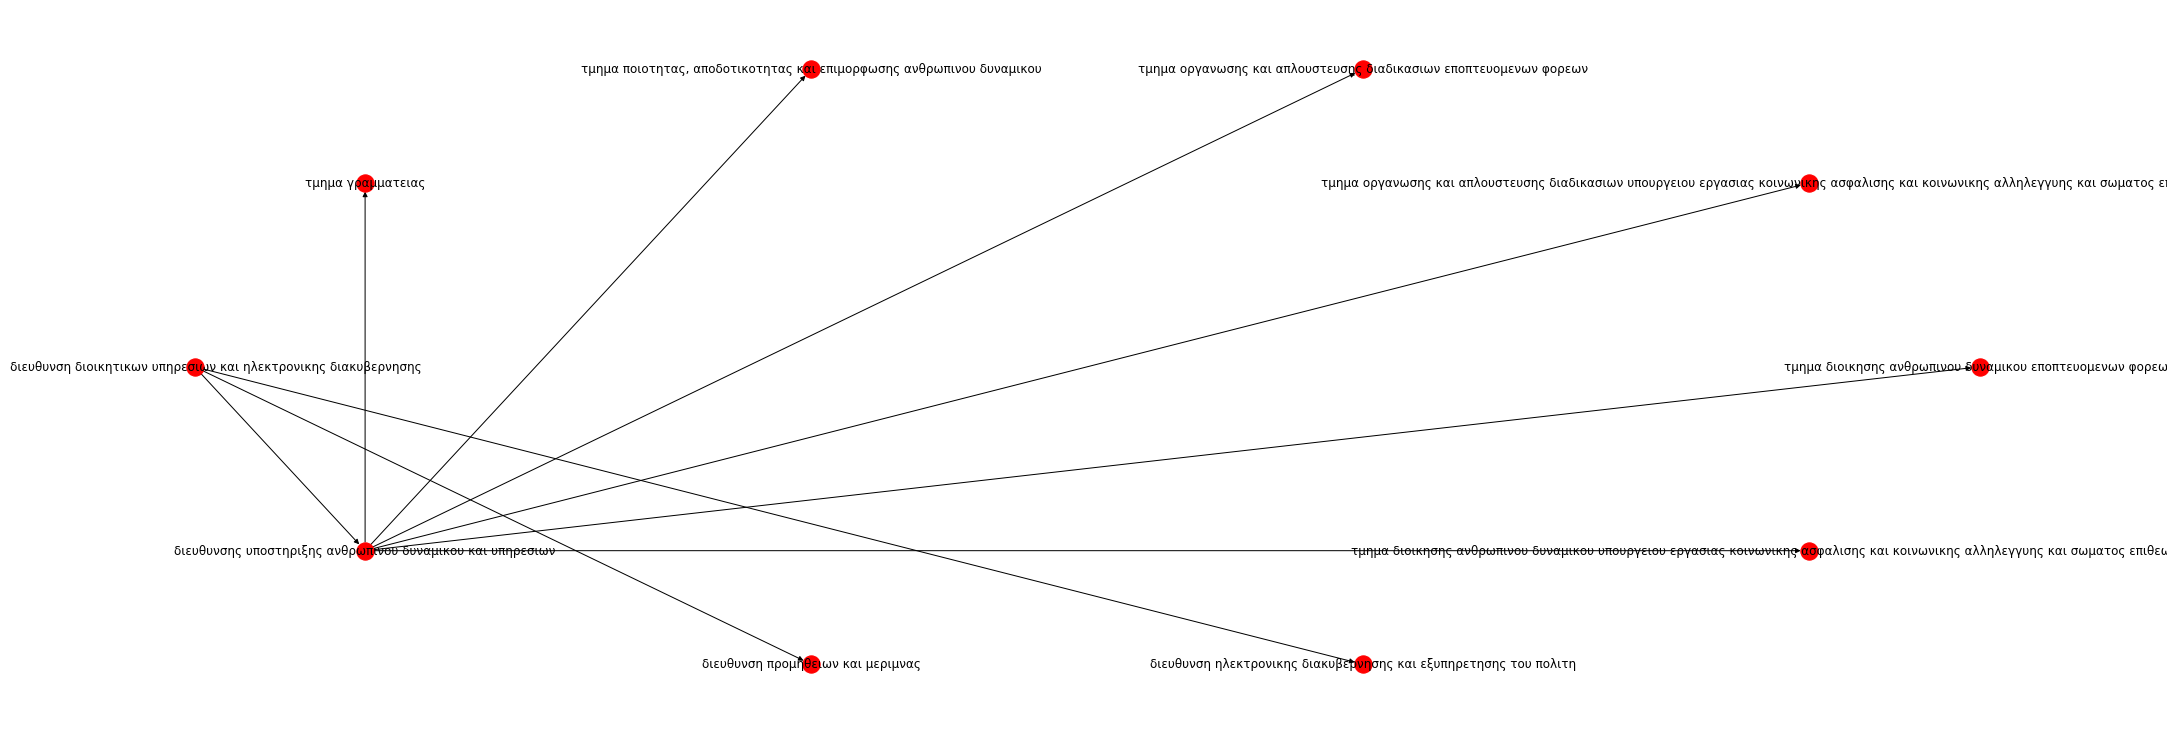

In [ ]:
plt.figure(figsize=(30,10))

pos = nx.shell_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 22 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

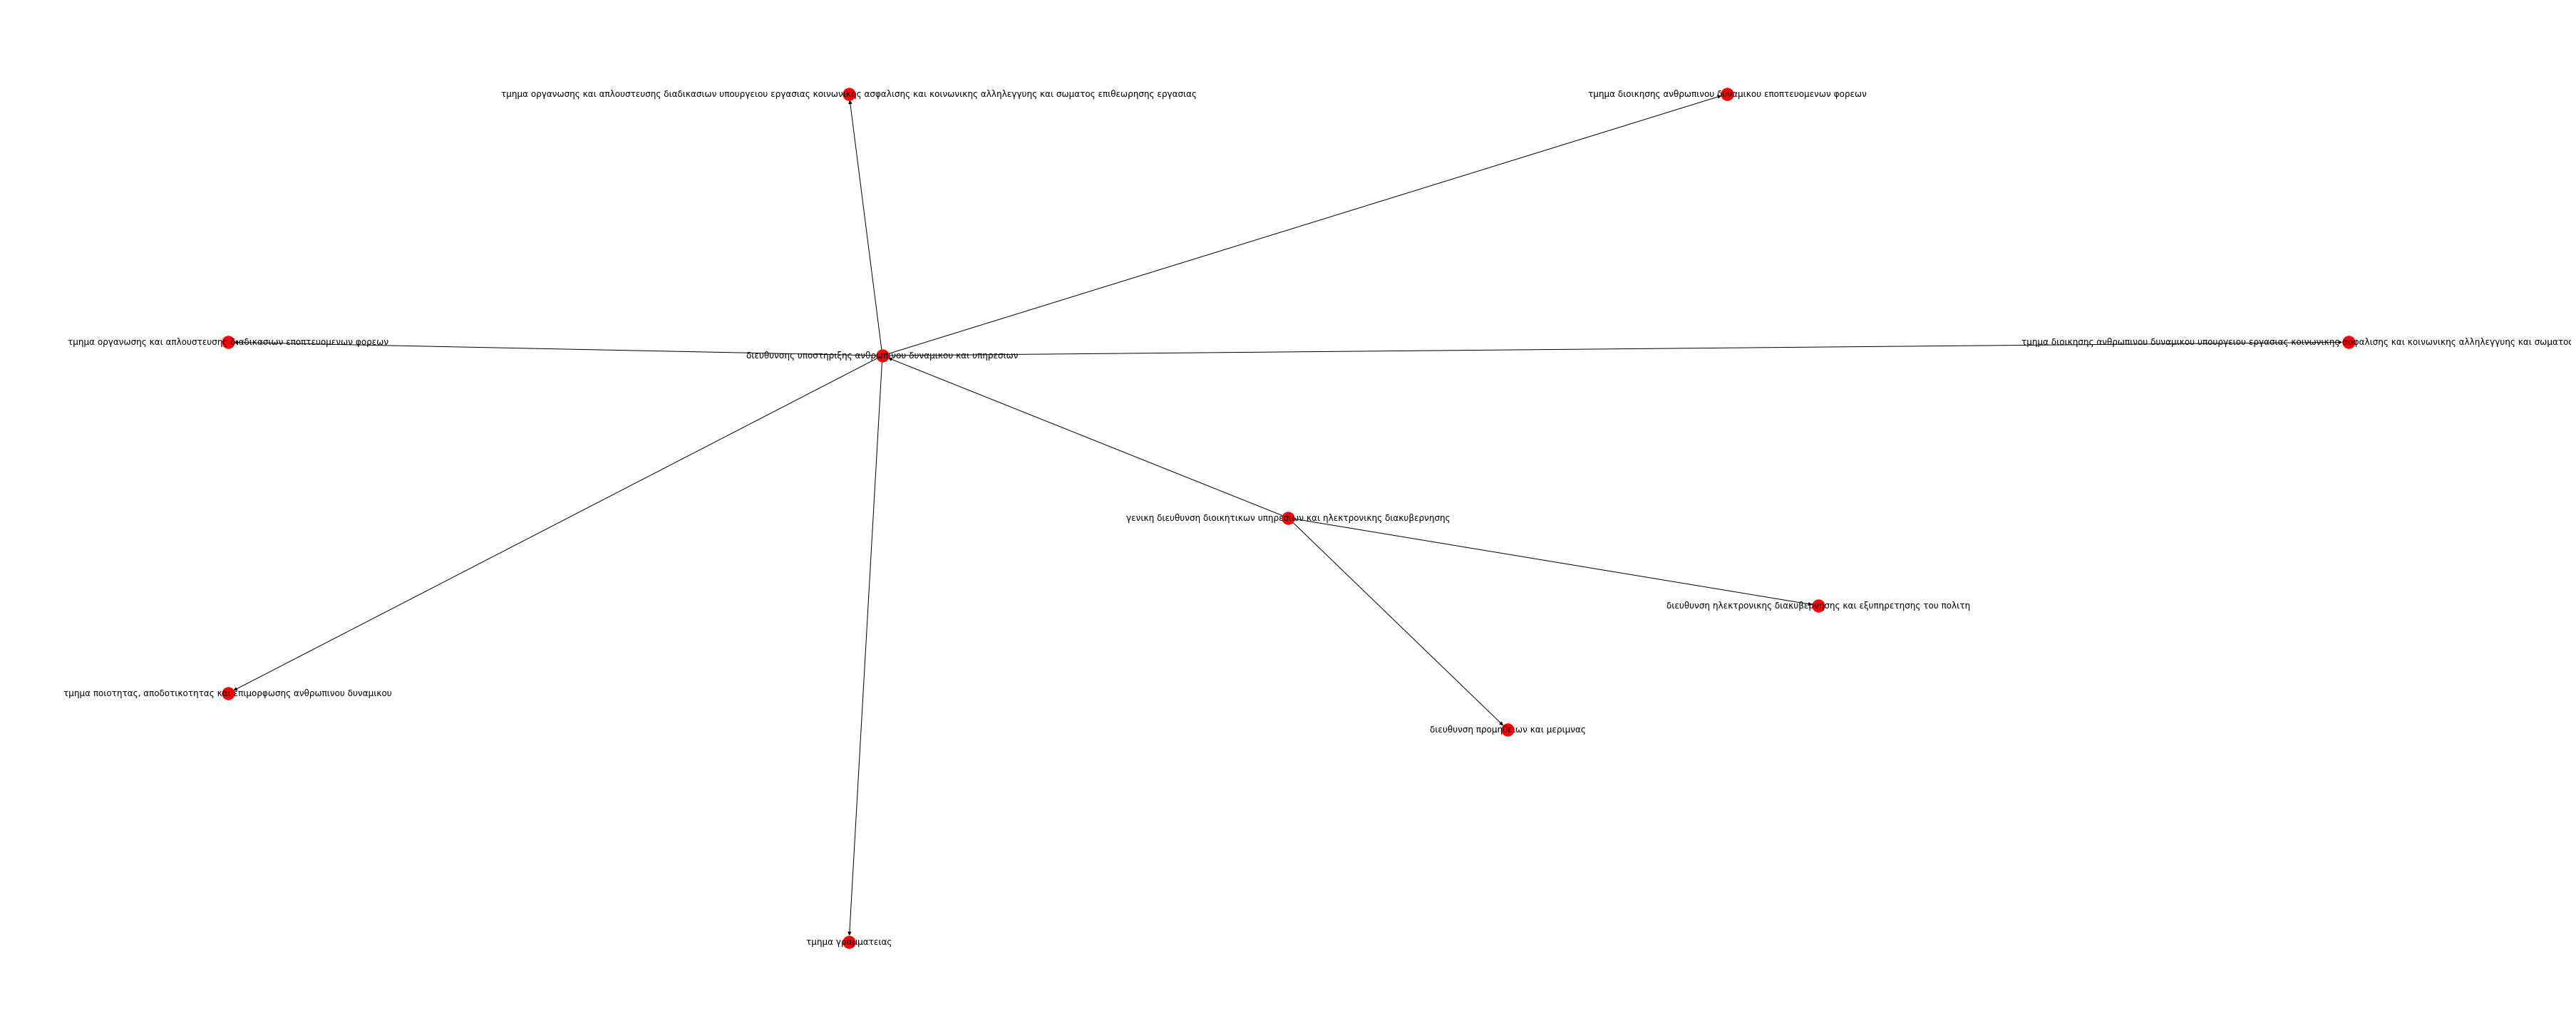

In [ ]:
plt.figure(figsize=(50,20))

pos = nx.nx_agraph.graphviz_layout(G, prog="twopi")
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

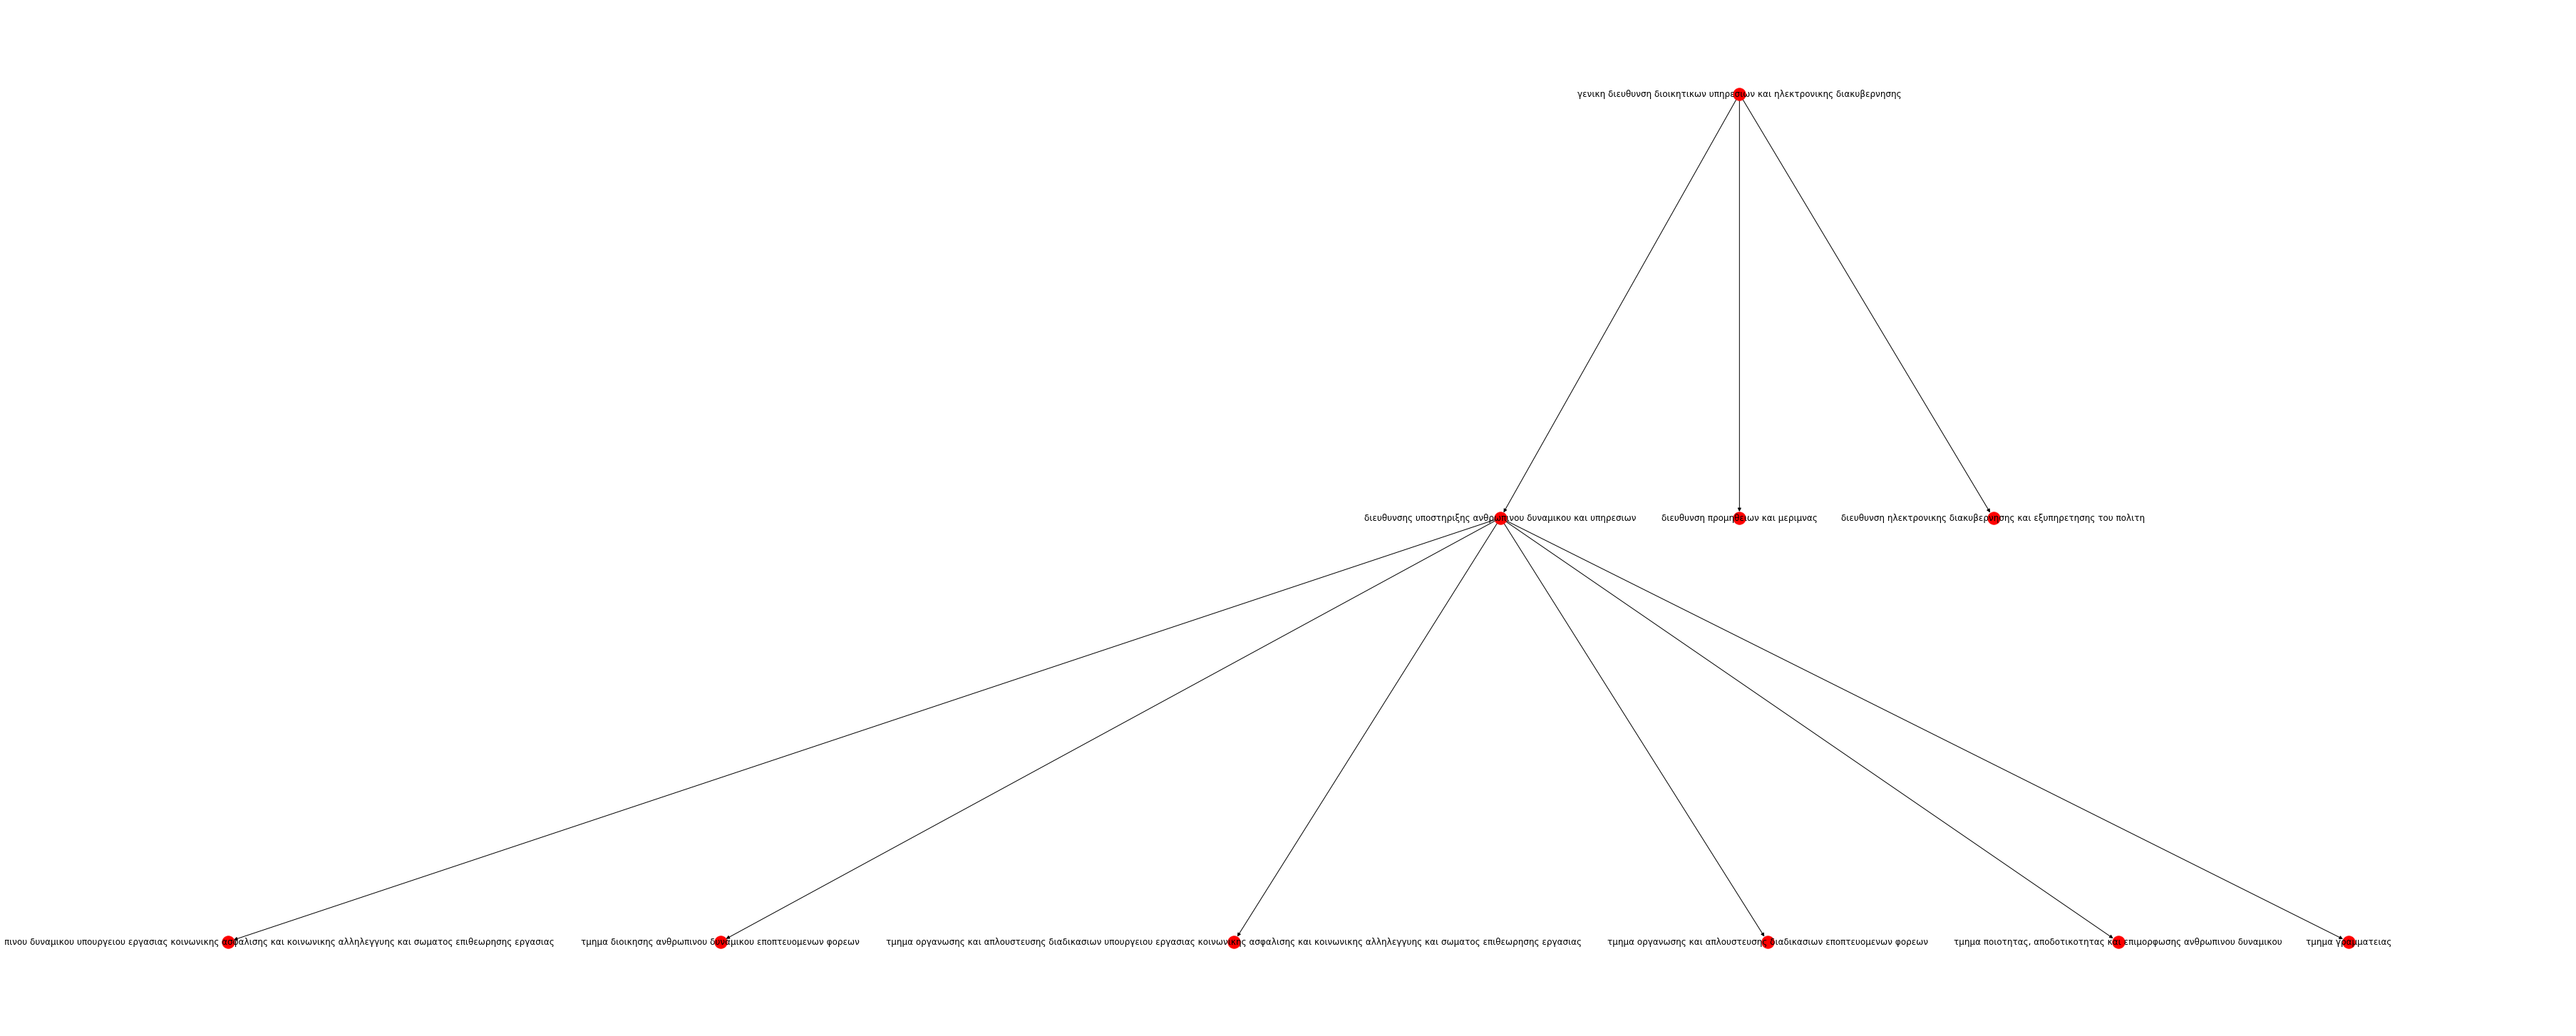

In [ ]:
plt.figure(figsize=(50,20))

pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()